<a href="https://colab.research.google.com/github/kaisarfardin6620/Text-Pair-Classification/blob/main/Text_Pair_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 6.8 MB/s eta 0:00:00


In [ ]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 11.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
!pip install --upgrade numpy
!pip install --upgrade --force-reinstall gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 57.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.5 which is incompatible.
  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp3

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import re
import nltk
import spacy
import string
import unidecode
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from transformers import BertTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
import gensim
from gensim.models import Word2Vec
import tensorflow as tf
import os
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
import tensorflow as tf
from transformers import DistilBertTokenizer, TFDistilBertModel
from tensorflow.keras.layers import Input, Dense, Embedding, LSTM, SpatialDropout1D, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import mixed_precision


In [ ]:
mixed_precision.set_global_policy("mixed_float16")

In [ ]:
os.environ["OMP_NUM_THREADS"] = "4"
os.environ["TF_INTER_OP_PARALLELISM_THREADS"] = "4"
os.environ["TF_INTRA_OP_PARALLELISM_THREADS"] = "4"

tf.config.threading.set_intra_op_parallelism_threads(4)
tf.config.threading.set_inter_op_parallelism_threads(4)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/train.csv')

In [ ]:
df = df.sample(n=1000, random_state=42).reset_index(drop=True)

In [ ]:
df.head()

,id,premise,hypothesis,lang_abv,language,label
0,f4891fa23f,Кто? Она спросила его с неожиданным интересом.,"Она спросила, как это сделать, так как с её то...",ru,Russian,1
1,e8b38c6175,Others are Zao (in Tohoku) and a number of res...,There are a lot of resorts in the national park.,en,English,0
2,e0a29d673a,trying to keep grass alive during a summer on ...,There was no cost in keeping the grass alive i...,en,English,2
3,26222ec767,so i guess my experience is is just with what ...,They were able to be home rather than having t...,en,English,0
4,d0cf40f417,The Journal put the point succinctly to Is an...,"The Journal asked ""Is this a good political mo...",en,English,1


In [ ]:
df.tail()

,id,premise,hypothesis,lang_abv,language,label
995,06c1df23e7,so we've been out here well really in the hous...,We've planted flowers that were impossible to ...,en,English,0
996,4c29b6a61a,you know things like that But i don't follow a...,"I have two favorite teams, and I always watch ...",en,English,2
997,07879a46ec,dans les romans en français moderne parlant de...,Les romans français sont plus focalisés sur le...,fr,French,2
998,aa1e3aecc6,Based on field observations and some discussio...,"It had no basis, just pure speculation.",en,English,2
999,5a53ab3561,189 और उपयोगकर्ता की लागत का अनुमान इसी तरह से...,वे सटीक उपयोगकर्ता लागतों को जानते थे।,hi,Hindi,2


In [ ]:
df.shape

(1000, 6)

In [ ]:
df.describe()

,label
count,1000.000000
mean,0.947000
std,0.817839
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,2.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          1000 non-null   object
 1   premise     1000 non-null   object
 2   hypothesis  1000 non-null   object
 3   lang_abv    1000 non-null   object
 4   language    1000 non-null   object
 5   label       1000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [ ]:
df.isnull().sum()

,0
id,0
premise,0
hypothesis,0
lang_abv,0
language,0
label,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.dtypes

,0
id,object
premise,object
hypothesis,object
lang_abv,object
language,object
label,int64


In [ ]:
df.nunique()

,0
id,1000
premise,965
hypothesis,1000
lang_abv,15
language,15
label,3


In [ ]:
df.label.value_counts()

,count
label,
0,362
1,329
2,309


In [ ]:
label_counts = df['label'].value_counts()

<ipython-input-19-af0d0f91fbb7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")


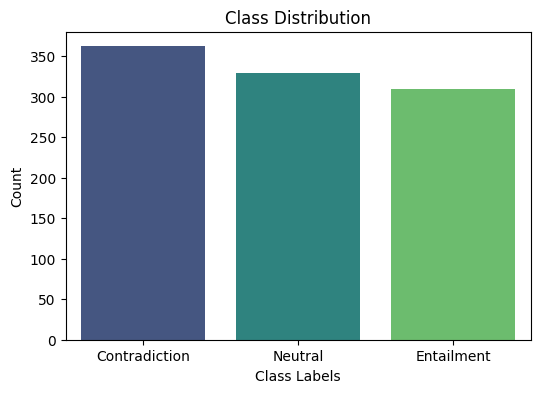

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")
plt.xticks(ticks=[0,1,2], labels=['Contradiction', 'Neutral', 'Entailment'])
plt.xlabel("Class Labels")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()

In [ ]:
df['sentence1_length'] = df['premise'].apply(lambda x: len(x.split()))
df['sentence2_length'] = df['hypothesis'].apply(lambda x: len(x.split()))

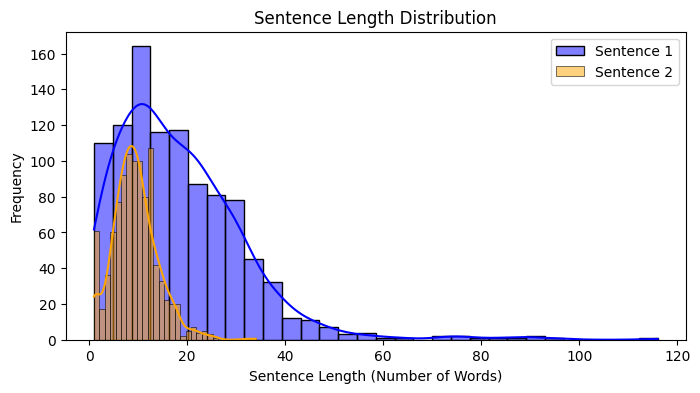

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(df['sentence1_length'], bins=30, kde=True, color='blue', label='Sentence 1')
sns.histplot(df['sentence2_length'], bins=30, kde=True, color='orange', label='Sentence 2')
plt.xlabel("Sentence Length (Number of Words)")
plt.ylabel("Frequency")
plt.title("Sentence Length Distribution")
plt.legend()
plt.show()

In [ ]:
def get_common_words(text_series, num_words=20):
    words = " ".join(text_series).split()
    common_words = Counter(words).most_common(num_words)
    return dict(common_words)

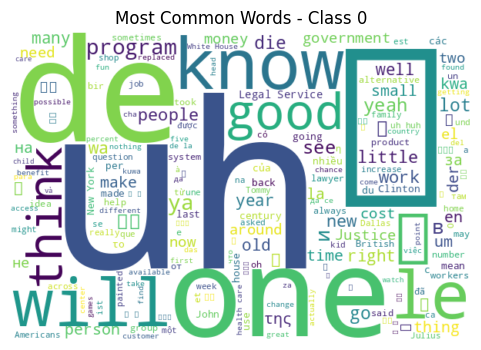

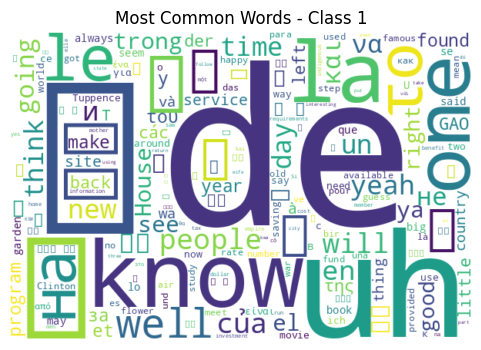

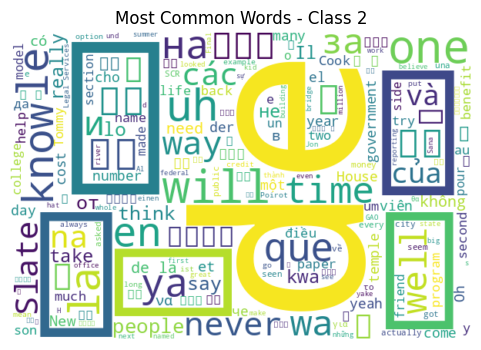

In [ ]:
for label, text_data in df.groupby("label"):
    words = " ".join(text_data["premise"]) + " " + " ".join(text_data["hypothesis"])
    wordcloud = WordCloud(width=600, height=400, background_color='white').generate(words)

    plt.figure(figsize=(6,4))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Most Common Words - Class {label}")
    plt.show()

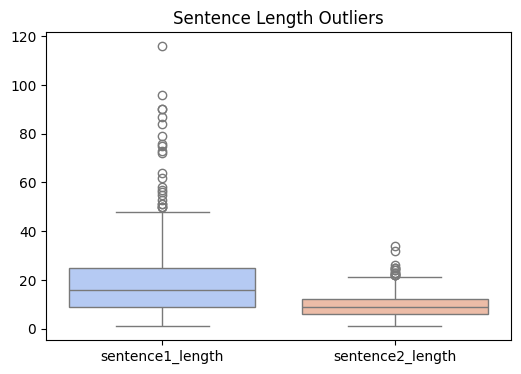

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df[['sentence1_length', 'sentence2_length']], palette="coolwarm")
plt.title("Sentence Length Outliers")
plt.show()

In [ ]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [ ]:
df = remove_outliers(df, 'sentence1_length')
df = remove_outliers(df, 'sentence2_length')

In [ ]:
print("Dataset size after outlier removal:", df.shape)

Dataset size after outlier removal: (963, 8)


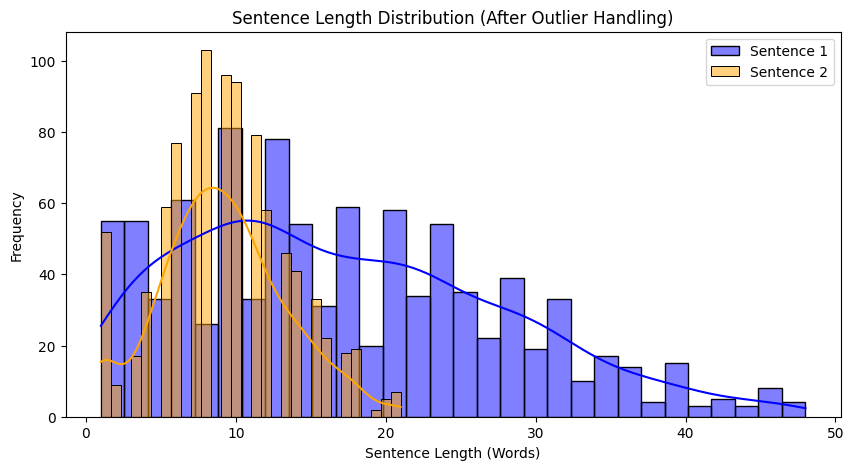

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df['sentence1_length'], bins=30, kde=True, color='blue', label='Sentence 1')
sns.histplot(df['sentence2_length'], bins=30, kde=True, color='orange', label='Sentence 2')
plt.xlabel("Sentence Length (Words)")
plt.ylabel("Frequency")
plt.title("Sentence Length Distribution (After Outlier Handling)")
plt.legend()
plt.show()


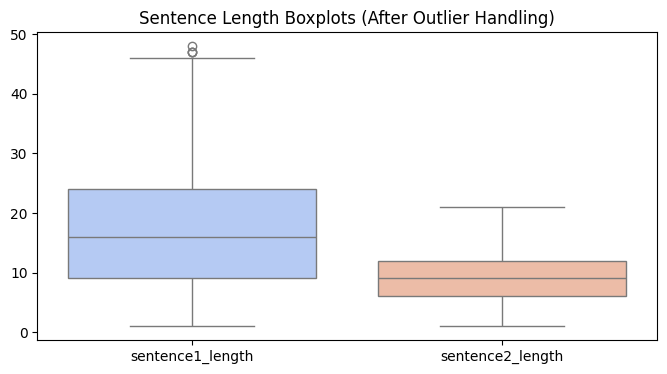

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df[['sentence1_length', 'sentence2_length']], palette="coolwarm")
plt.title("Sentence Length Boxplots (After Outlier Handling)")
plt.show()

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
def clean_text(text):
    text = text.lower()
    text = unidecode.unidecode(text)
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [ ]:
df['sentence1_clean'] = df['premise'].apply(clean_text)
df['sentence2_clean'] = df['hypothesis'].apply(clean_text)

In [ ]:
def spacy_tokenize(text):
    doc = nlp(text)
    tokens = [token.text for token in doc]
    return tokens

In [ ]:
df['sentence1_tokens'] = df['sentence1_clean'].apply(spacy_tokenize)
df['sentence2_tokens'] = df['sentence2_clean'].apply(spacy_tokenize)

In [ ]:
def remove_stopwords(text):
    doc = nlp(text)
    tokens = [token.text for token in doc if not token.is_stop]
    return " ".join(tokens)

In [ ]:
df['sentence1_clean'] = df['sentence1_clean'].apply(remove_stopwords)
df['sentence2_clean'] = df['sentence2_clean'].apply(remove_stopwords)

In [ ]:
def lemmatize_text(text):
    doc = nlp(text)
    lemmas = [token.lemma_ for token in doc]
    return " ".join(lemmas)

In [ ]:
df['sentence1_clean'] = df['sentence1_clean'].apply(lemmatize_text)
df['sentence2_clean'] = df['sentence2_clean'].apply(lemmatize_text)

In [ ]:
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
df['sentence1_tokens'] = df['premise'].apply(lambda x: tokenizer.tokenize(x))
df['sentence2_tokens'] = df['hypothesis'].apply(lambda x: tokenizer.tokenize(x))

In [ ]:
print(df[['sentence1_clean', 'sentence2_clean']].head())

                                     sentence1_clean  \
0      kto ona sprosila ego s neozhidannym interesom   
1  zao tohoku number resort joshin etsu kogen nat...   
2   try grass alive summer piece grind big expensive   
3  guess experience didn t child care route able ...   
4  journal point succinctly publicity good publicity   

                                     sentence2_clean  
0  ona sprosila kak eto sdelat tak kak s eio toch...  
1                           lot resort national park  
2                  cost keep grass alive summer time  
3                able home have worry get child care  
4                         journal ask good political  


In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))

In [ ]:
X1_tfidf = tfidf_vectorizer.fit_transform(df['sentence1_clean'])
X2_tfidf = tfidf_vectorizer.transform(df['sentence2_clean'])

In [ ]:
X1_tfidf = X1_tfidf.toarray()
X2_tfidf = X2_tfidf.toarray()

In [ ]:
X_tfidf = np.hstack((X1_tfidf, X2_tfidf))

In [ ]:
print("TF-IDF Feature Shape:", X_tfidf.shape)

TF-IDF Feature Shape: (963, 10000)


In [ ]:
df['sentence1_tokens'] = df['sentence1_clean'].apply(lambda x: x.split())
df['sentence2_tokens'] = df['sentence2_clean'].apply(lambda x: x.split())

In [ ]:
all_sentences = df['sentence1_tokens'].tolist() + df['sentence2_tokens'].tolist()

In [ ]:
w2v_model = Word2Vec(sentences=all_sentences, vector_size=300, window=5, min_count=2, workers=4)

In [ ]:
def get_sentence_embedding(sentence, model, vector_size=300):
    embeddings = [model.wv[word] for word in sentence if word in model.wv]
    return np.mean(embeddings, axis=0) if embeddings else np.zeros(vector_size)

In [ ]:
X1_w2v = np.array([get_sentence_embedding(sentence, w2v_model) for sentence in df['sentence1_tokens']])
X2_w2v = np.array([get_sentence_embedding(sentence, w2v_model) for sentence in df['sentence2_tokens']])

In [ ]:
X_w2v = np.hstack((X1_w2v, X2_w2v))

In [ ]:
print("Word2Vec Feature Shape:", X_w2v.shape)

Word2Vec Feature Shape: (963, 600)


In [ ]:
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
model = TFDistilBertModel.from_pretrained("distilbert-base-uncased")

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_transform.bias', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [ ]:
X1_bert = []
X2_bert = []

In [ ]:
tokenized_data = {
    "X1": X1_bert,
    "X2": X2_bert
}

with open("tokenized_data.pkl", "wb") as f:
    pickle.dump(tokenized_data, f)

with open("tokenized_data.pkl", "rb") as f:
    tokenized_data = pickle.load(f)

X1_bert = np.array(tokenized_data["X1"])
X2_bert = np.array(tokenized_data["X2"])

In [ ]:
X_bert = np.hstack([X1_bert, X2_bert])

In [ ]:
#def get_bert_embedding(text):
 #   inputs = tokenizer(text, return_tensors="tf")
  #  outputs = model(**inputs)
   # embeddings = outputs.last_hidden_state[:, 0, :]
    #return embeddings.numpy()

#df['sentence1_bert'] = df['sentence1_clean'].apply(get_bert_embedding)
#df['sentence2_bert'] = df['sentence2_clean'].apply(get_bert_embedding)

#X1_bert = np.vstack(df['sentence1_bert'].values.tolist())
#X2_bert = np.vstack(df['sentence2_bert'].values.tolist())

In [ ]:
#tokenized_data = {
 #   "X1": X1_bert,
  #  "X2": X2_bert
#}

#with open("tokenized_data.pkl", "wb") as f:
 #   pickle.dump(tokenized_data, f)

#with open("tokenized_data.pkl", "rb") as f:
 #   tokenized_data = pickle.load(f)

#X1_bert = np.array(tokenized_data["X1"])
#X2_bert = np.array(tokenized_data["X2"])

In [ ]:
#X_bert_reshaped = X_bert.reshape(X_bert.shape[0], -1)

In [ ]:
#print("BERT Feature Shape:", X_bert.shape)

In [ ]:
x = np.hstack((X_tfidf, X_w2v))
#x = np.hstack((X_tfidf, X_w2v, X_bert_reshaped))

In [ ]:
y = df['label']

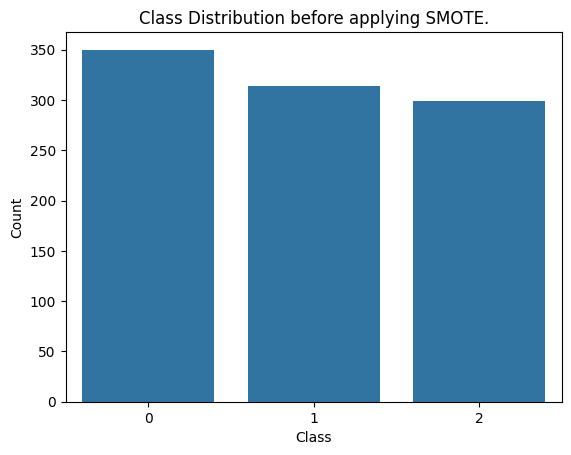

In [ ]:
sns.countplot(x=y)
plt.title("Class Distribution before applying SMOTE.")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

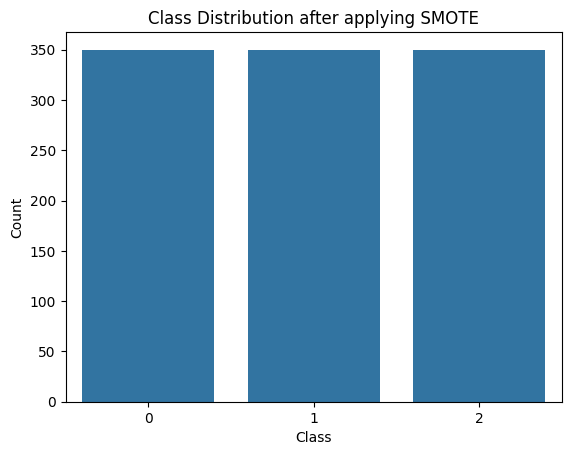

In [ ]:
sns.countplot(x=y_resampled)
plt.title("Class Distribution after applying SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(x_train, y_train)

y_pred_rf = rf_model.predict(x_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.4142857142857143
              precision    recall  f1-score   support

           0       0.37      0.41      0.39        69
           1       0.42      0.40      0.41        73
           2       0.45      0.44      0.45        68

    accuracy                           0.41       210
   macro avg       0.42      0.41      0.42       210
weighted avg       0.42      0.41      0.41       210



In [ ]:
dt_model = DecisionTreeClassifier(max_depth=10, random_state=42)
dt_model.fit(x_train, y_train)

y_pred_dt = dt_model.predict(x_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.4238095238095238
              precision    recall  f1-score   support

           0       0.32      0.28      0.29        69
           1       0.46      0.45      0.46        73
           2       0.47      0.54      0.50        68

    accuracy                           0.42       210
   macro avg       0.42      0.42      0.42       210
weighted avg       0.42      0.42      0.42       210



In [ ]:
xgb_model = xgb.XGBClassifier(n_estimators=100, max_depth=10, learning_rate=0.1, random_state=42)
xgb_model.fit(x_train, y_train)

y_pred_xgb = xgb_model.predict(x_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.4380952380952381
              precision    recall  f1-score   support

           0       0.41      0.32      0.36        69
           1       0.46      0.44      0.45        73
           2       0.44      0.56      0.49        68

    accuracy                           0.44       210
   macro avg       0.44      0.44      0.43       210
weighted avg       0.44      0.44      0.43       210



In [ ]:
ann_model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(3, activation='softmax')  # 3 classes: Contradiction, Neutral, Entailment
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
ann_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
ann_model.fit(x_train, y_train, epochs=20, batch_size=8, validation_data=(x_test, y_test), callbacks=[early_stopping])

Epoch 1/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 16s 127ms/step - accuracy: 0.3194 - loss: 1.1014 - val_accuracy: 0.3905 - val_loss: 1.0890
Epoch 2/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 19s 121ms/step - accuracy: 0.7218 - loss: 0.8701 - val_accuracy: 0.4190 - val_loss: 1.3663
Epoch 3/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 21s 123ms/step - accuracy: 0.9193 - loss: 0.2603 - val_accuracy: 0.4381 - val_loss: 1.6705
Epoch 4/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 21s 128ms/step - accuracy: 0.9659 - loss: 0.0807 - val_accuracy: 0.4381 - val_loss: 1.9925


In [ ]:
y_pred_ann = ann_model.predict(x_test).argmax(axis=1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step


In [ ]:
print("ANN Accuracy:", accuracy_score(y_test, y_pred_ann))
print(classification_report(y_test, y_pred_ann))

ANN Accuracy: 0.3904761904761905
              precision    recall  f1-score   support

           0       0.36      0.96      0.52        69
           1       0.57      0.05      0.10        73
           2       0.67      0.18      0.28        68

    accuracy                           0.39       210
   macro avg       0.53      0.40      0.30       210
weighted avg       0.53      0.39      0.30       210



In [ ]:
lstm_model = tf.keras.Sequential([
    Embedding(input_dim=20000, output_dim=128, input_length=x_train.shape[1]),
    SpatialDropout1D(0.3),
    Bidirectional(LSTM(64, return_sequences=True)),
    Bidirectional(LSTM(32)),
    tf.keras.layers.Dense(3, activation='softmax')  # 3 classes
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

NameError: name 'lstm_model' is not defined

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
lstm_model.fit(x_train, y_train,  batch_size=32, validation_data=(x_test, y_test))
#lstm_model.fit(x_train, y_train, epochs=20, batch_size=8, validation_data=(x_test, y_test), callbacks=[early_stopping])

NameError: name 'lstm_model' is not defined

In [ ]:
y_pred_lstm = lstm_model.predict(x_test).argmax(axis=1)

In [ ]:
print("LSTM Accuracy:", accuracy_score(y_test, y_pred_lstm))
print(classification_report(y_test, y_pred_lstm))

In [ ]:
#bert_model = TFBertModel.from_pretrained("bert-base-uncased")
#tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

In [ ]:
#def bert_encode(texts, tokenizer, max_length=128):
 #   return tokenizer(texts.tolist(), padding='max_length', truncation=True, max_length=max_length, return_tensors='tf')

In [ ]:
#train_encodings = bert_encode(df['sentence1_clean'] + " " + df['sentence2_clean'], tokenizer)
#x_train, x_test, y_train, y_test = train_test_split(train_encodings['input_ids'], df['label'], test_size=0.2, random_state=42)

In [ ]:
#input_ids = Input(shape=(128,), dtype=tf.int32, name="input_ids")
#bert_output = bert_model(input_ids)[1]  # Pooled output
#dense = Dense(128, activation='relu')(bert_output)
#output = Dense(3, activation='softmax')(dense)

In [ ]:
#bert_classifier = Model(inputs=input_ids, outputs=output)
#bert_classifier.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

In [ ]:
#bert_classifier.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=8, callbacks=[early_stopping])

In [ ]:
#y_pred_bert = bert_classifier.predict(x_test).argmax(axis=1)

In [ ]:
#print("BERT Fine-Tuning Accuracy:", accuracy_score(y_test, y_pred_bert))
#print(classification_report(y_test, y_pred_bert))

In [ ]:
def evaluate_model(y_true, y_pred, y_proba, model_name):
    print(f"\n📊 Evaluation Results for {model_name}:\n")

    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix, classification_report
    from sklearn.preprocessing import label_binarize # Import label_binarize here
    import matplotlib.pyplot as plt
    import seaborn as sns

    accuracy = accuracy_score(y_true, y_pred)  # y_true and y_pred are passed as arguments to the function
    precision = precision_score(y_true, y_pred, average="weighted")
    recall = recall_score(y_true, y_pred, average="weighted")
    f1 = f1_score(y_true, y_pred, average="weighted")

    print(f"✅ Accuracy: {accuracy:.4f}")
    print(f"✅ Precision: {precision:.4f}")
    print(f"✅ Recall: {recall:.4f}")
    print(f"✅ F1 Score: {f1:.4f}")

    # Creating the confusion matrix inside the function
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Contradiction", "Neutral", "Entailment"], yticklabels=["Contradiction", "Neutral", "Entailment"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    print("\n🔎 Classification Report:\n", classification_report(y_true, y_pred, target_names=["Contradiction", "Neutral", "Entailment"]))

    # Check if y_proba is provided and not None before plotting ROC curve
    if y_proba is not None:
        # Ensure y_true is binary for ROC curve
        y_true_bin = label_binarize(y_true, classes=[0, 1, 2])
        plt.figure(figsize=(8, 6))

        for i, label in enumerate(["Contradiction", "Neutral", "Entailment"]):
            fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_proba[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f"{label} (AUC = {roc_auc:.2f})")

        plt.plot([0, 1], [0, 1], 'k--', lw=2)
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"AUC-ROC Curve - {model_name}")
        plt.legend(loc="lower right")
        plt.show()

In [ ]:
y_pred_rf = rf_model.predict(x_test)
y_proba_rf = rf_model.predict_proba(x_test) if hasattr(rf_model, "predict_proba") else None
evaluate_model(y_test, y_pred_rf, y_proba_rf, "Random Forest")

In [ ]:
y_pred_dt = dt_model.predict(x_test)
y_proba_dt = dt_model.predict_proba(x_test) if hasattr(dt_model, "predict_proba") else None
evaluate_model(y_test, y_pred_dt, y_proba_dt, "Decision Tree")

In [ ]:
y_pred_xgb = xgb_model.predict(x_test)
y_proba_xgb = xgb_model.predict_proba(x_test) if hasattr(xgb_model, "predict_proba") else None
evaluate_model(y_test, y_pred_xgb, y_proba_xgb, "XGBoost")

In [ ]:
y_proba_ann = ann_model.predict(x_test) # Get probabilities
y_pred_ann = y_proba_ann.argmax(axis=1)  # Get class labels
evaluate_model(y_test, y_pred_ann, y_proba_ann, "Artificial Neural Network")

In [ ]:
y_proba_lstm = lstm_model.predict(x_test) # Get probabilities
y_pred_lstm = y_proba_lstm.argmax(axis=1)  # Get class labels
evaluate_model(y_test, y_pred_lstm, y_proba_lstm, "LSTM")

In [ ]:
#y_pred_bert = bert_model.predict(x_test)
#y_pred_bert = y_pred_bert.argmax(axis=1)
#evaluate_model(y_test, y_pred_bert, None, "Fine-Tuned BERT")

In [ ]:
!pip install optuna

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform, randint
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
import optuna


In [ ]:
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_dt.fit(x_train, y_train)

In [ ]:
print("🌟 Best Parameters for Decision Tree:", grid_search_dt.best_params_)
dt_model = grid_search_dt.best_estimator_

In [ ]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [ ]:
random_search_rf = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid_rf, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search_rf.fit(x_train, y_train)

In [ ]:
print("🌟 Best Parameters for Random Forest:", random_search_rf.best_params_)
rf_model = random_search_rf.best_estimator_

In [ ]:
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

In [ ]:
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_xgb.fit(x_train, y_train)

In [ ]:
print("🌟 Best Parameters for XGBoost:", grid_search_xgb.best_params_)
xgb_model = grid_search_xgb.best_estimator_

In [ ]:
def objective(trial):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(trial.suggest_int('units1', 64, 256), activation='relu'),
        tf.keras.layers.Dropout(trial.suggest_float('dropout1', 0.2, 0.5)),
        tf.keras.layers.Dense(trial.suggest_int('units2', 32, 128), activation='relu'),
        tf.keras.layers.Dropout(trial.suggest_float('dropout2', 0.2, 0.5)),
        tf.keras.layers.Dense(3, activation='softmax')
    ])

In [ ]:
    model.compile(
        optimizer=Adam(learning_rate=trial.suggest_loguniform('lr', 1e-4, 1e-2)),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

In [ ]:
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=trial.suggest_int('batch_size', 16, 64), verbose=0)
    return max(history.history['val_accuracy'])

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

In [ ]:
print("🌟 Best Parameters for ANN:", study.best_params_)

In [ ]:
def objective_lstm(trial):
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(input_dim=5000, output_dim=trial.suggest_int('embedding_dim', 50, 300)),
        tf.keras.layers.LSTM(trial.suggest_int('lstm_units', 50, 200), return_sequences=True),
        tf.keras.layers.Dropout(trial.suggest_float('dropout', 0.2, 0.5)),
        tf.keras.layers.LSTM(trial.suggest_int('lstm_units_2', 50, 200)),
        tf.keras.layers.Dense(3, activation='softmax')
    ])

In [ ]:
    model.compile(
        optimizer=Adam(learning_rate=trial.suggest_loguniform('lr', 1e-4, 1e-2)),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

In [ ]:
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=trial.suggest_int('batch_size', 16, 64), verbose=0)
    return max(history.history['val_accuracy'])

In [ ]:
study_lstm = optuna.create_study(direction='maximize')
study_lstm.optimize(objective_lstm, n_trials=20)

In [ ]:
print("🌟 Best Parameters for LSTM:", study_lstm.best_params_)

In [ ]:
#from transformers import TFBertForSequenceClassification, BertTokenizer
#import tensorflow as tf

In [ ]:
#bert_model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3)

In [ ]:
#tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

In [ ]:
"""def fine_tune_bert(learning_rate, batch_size):
    optimizer = Adam(learning_rate=learning_rate)
    bert_model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
#history = bert_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=batch_size)
#return max(history.history['val_accuracy'])

In [ ]:
#study_bert = optuna.create_study(direction='maximize')
#study_bert.optimize(lambda trial: fine_tune_bert(trial.suggest_loguniform('lr', 1e-5, 5e-5), trial.suggest_int('batch_size', 8, 32)), n_trials=10)

In [ ]:
#print("🌟 Best Parameters for BERT:", study_bert.best_params_)

In [ ]:
model_results = {
    "Model": ["Decision Tree", "Random Forest", "XGBoost", "Artificial Neural Network", "LSTM", "Fine-Tuned BERT"],
    "Accuracy": [dt_accuracy, rf_accuracy, xgb_accuracy, ann_accuracy, lstm_accuracy, bert_accuracy],
    "Precision": [dt_precision, rf_precision, xgb_precision, ann_precision, lstm_precision, bert_precision],
    "Recall": [dt_recall, rf_recall, xgb_recall, ann_recall, lstm_recall, bert_recall],
    "F1 Score": [dt_f1, rf_f1, xgb_f1, ann_f1, lstm_f1, bert_f1],
}

In [ ]:
df_results = pd.DataFrame(model_results)

In [ ]:
df_results = df_results.sort_values(by="Accuracy", ascending=False)

In [ ]:
print("📊 Model Performance Comparison:\n", df_results)

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(df_results["Model"], df_results["Accuracy"], color=['blue', 'green', 'red', 'purple', 'orange', 'brown'])
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.title("Model Accuracy Comparison")
plt.gca().invert_yaxis()
plt.show()
